# MULTIPLE POLYNOMIAL REGRESSION

<b>The data set used is the data set containing the real estate market information. It includes the number of rooms, the age of the building, the number of floors, square meters, and the price information.

In [1]:
import warnings as wrn
wrn.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('real_estate.csv')
df.head()

,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.to_csv('real_estate.csv')

<b>Hold-Out

In [5]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


<b>Polynomial Degree Generating Function

In [6]:
from sklearn.preprocessing import PolynomialFeatures

<b>We create the polynomial degrees of the features from the second order to the tenth order and calculate the error score of the model created with each polynomial degree. Here we use RMSE as the error score.

In [7]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

<b>The R2 measure can be overly sensitive when it comes to polynomial functions. Therefore, RMSE is widely used for error score when Grid Search is done to determine the appropriate polynomial degree.

<b>Train set Features

In [8]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg


In [9]:
print(f'Best Model RMSE :{min_rmse} degree :{min_deg}')

Best Model RMSE :56.48843719880617 degree :2


<b>RMSE scores for all polynomial values on the graph

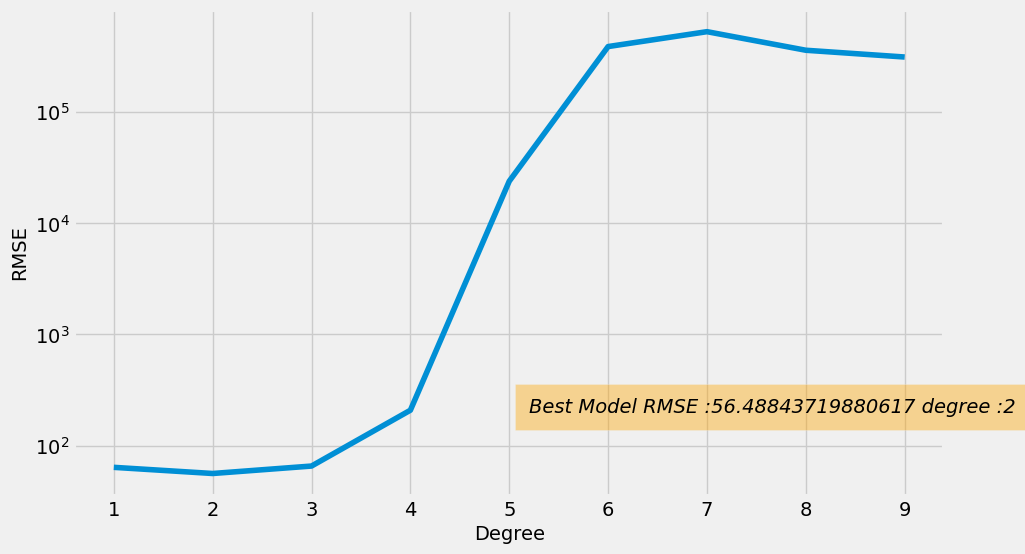

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(degrees,rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.text(5.2,200,(f'Best Model RMSE :{min_rmse} degree :{min_deg}'),style='italic',
         bbox={'facecolor' : 'orange', 'alpha' : 0.4, 'pad' : 10})
plt.show()

<b>The lowest error score is obtained when we take the polynomial degrees of all the features in the second degree. Now that we have determined the appropriate polynomial degree as 2, we can now create the model according to this polynomial degree and look at its performance in the test set.

In [11]:
poly_deg = PolynomialFeatures(degree=2)
X_train_poly = poly_deg.fit_transform(X_train)
X_test_poly = poly_deg.fit_transform(X_test)

In [12]:
poly_reg =LinearRegression().fit(X_train_poly,y_train)

model = LinearRegression().fit(X_train,y_train)

<b>Prediction performance of multilinear model for training and test sets

In [13]:
print(f'Linear Reg Train R2 :{model.score(X_train,y_train)}')
print(f'Linear Reg Test R2 :{model.score(X_test,y_test)}')

Linear Reg Train R2 :0.733739961656849
Linear Reg Test R2 :0.6987282352837991


<b>Prediction performance of multiple polynomial model for training and test sets

In [14]:
print(f'Polynomial Reg Train R2 :{poly_reg.score(X_train_poly,y_train)}')
print(f'Polynomial Reg Test R2 :{poly_reg.score(X_test_poly,y_test)}')

Polynomial Reg Train R2 :0.8488074651060601
Polynomial Reg Test R2 :0.7663814623334426


In [15]:
X_poly = poly_deg.transform(X)
df['price_pred'] = poly_reg.predict(X_poly)

<b>Graph

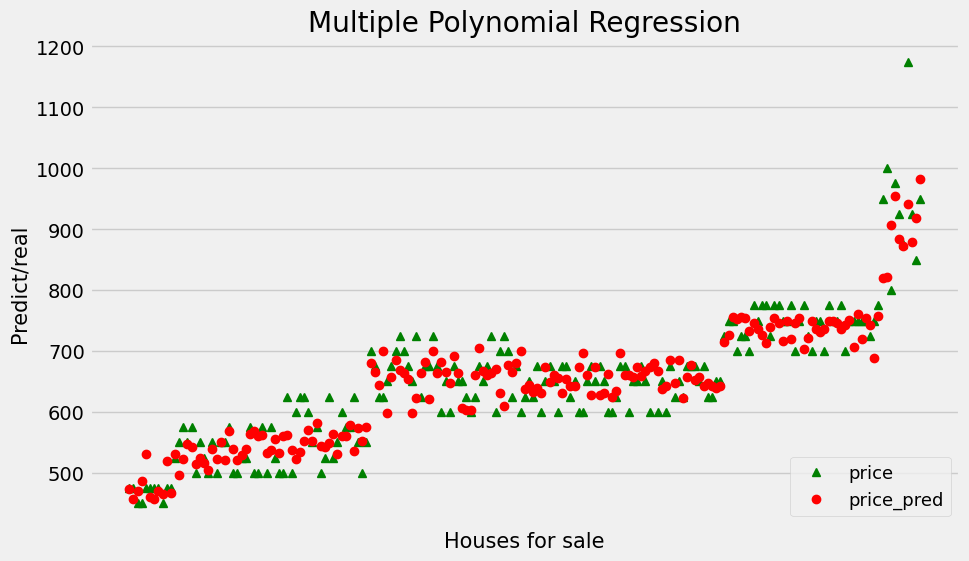

In [16]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.title('Multiple Polynomial Regression')
plt.xticks(df['price'],df.index.values)
plt.plot(df['price'],'g^',label='price')
plt.xticks(df['price_pred'],df.index.values)
plt.plot(df['price_pred'],'ro',label='price_pred')
plt.xlabel('Houses for sale',fontsize=15)
plt.ylabel('Predict/real',fontsize=15)
plt.legend(fontsize=13,loc='lower right')
plt.show()

# DETERMINING THE SUITABLE POLYNOMIAL DEGREE

<b> Is there really a non-linear relationship between the prices of the flats for sale and each property? Can't the relation of the target variable with some properties be linear/polynomial with their own self or even if the relation of the target variable with the properties is curvilinear, does it have the same degree of polynomial relation with each of them?

In [17]:
df = pd.read_csv('real_estate.csv')
df.head()

,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [18]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

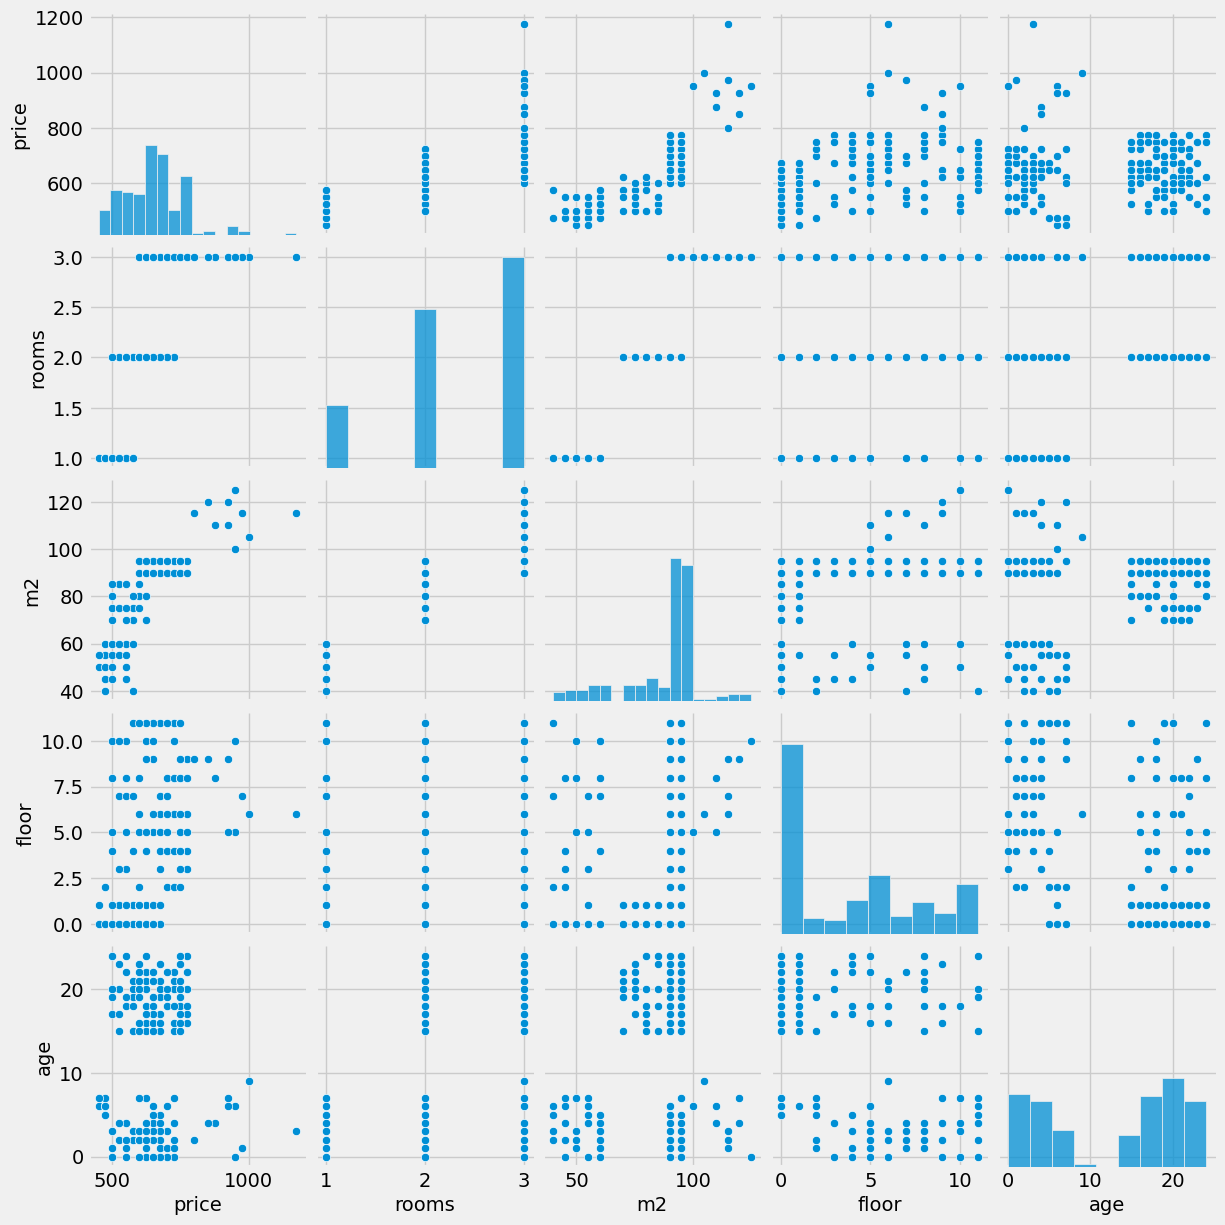

In [20]:
g = sns.pairplot(df)

<b>At first glance, a linear relationship between the price and the number of rooms can be clearly seen. We cannot say that there is a linear relationship with the same precision about the data points obtained from the scatter diagrams of the other properties of house prices.

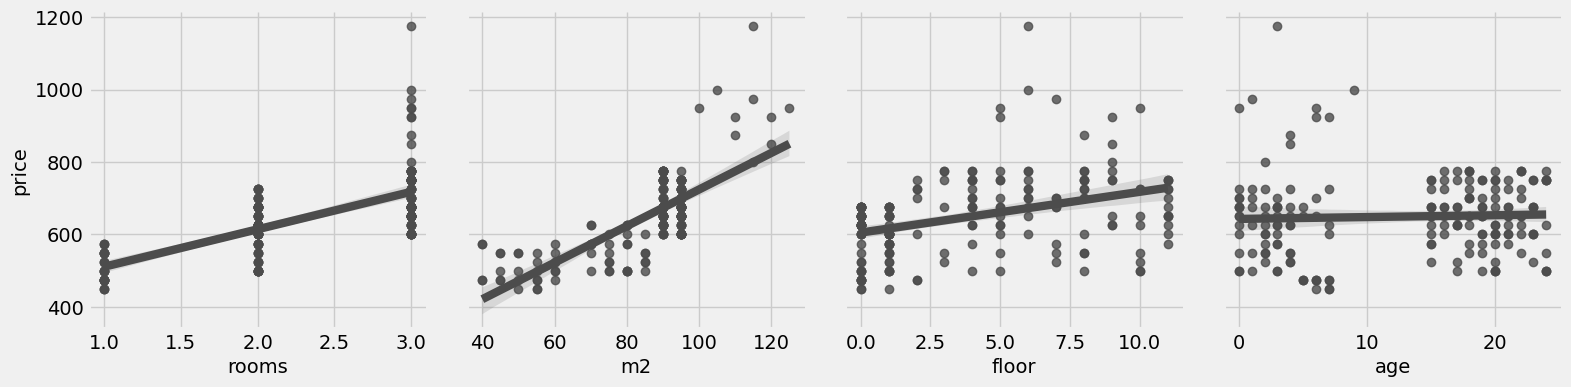

In [21]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['rooms','m2','floor','age'],height=4)

g.map(sns.regplot,lowess=False,color='.3')

<b>When we look at the Local Regression curves, we can observe the trends of the data points. The lowess curve of the price and the number of rooms was not created because these two have a perfectly linear relationship. At first glance, the relationship between house prices and the measurement of the width, the floor and the age of the building does not seem linear. In addition, it can be seen that the polynomial relationship between the face measurement variable and the floor where the house is located and the age of the building is not of the same degree with the target variable.

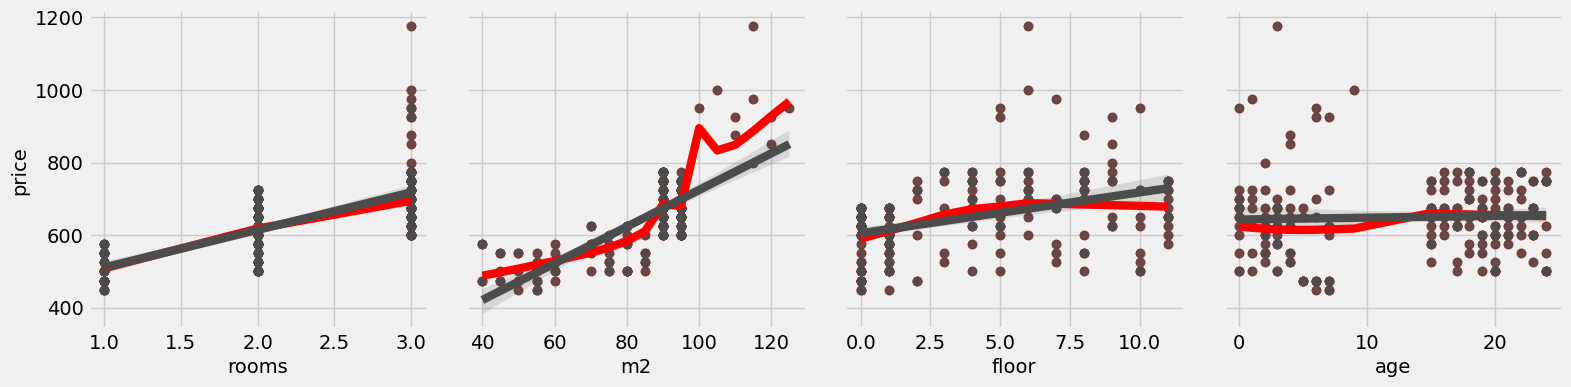

In [22]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['rooms','m2','floor','age'],height=4)

g.map(sns.regplot,lowess=True,color='red')
g.map(sns.regplot,lowess=False,color='.3')

<b>While the relation of the target variable with the number of rooms is linear, its relation with the other properties of the houses is not linear. This is pretty obvious, especially for the m2 and floor variables.

<b>When estimating with polynomial regression, we do not need to take the polynomial degrees of the room number and age variables. We will use them as they are in the model.

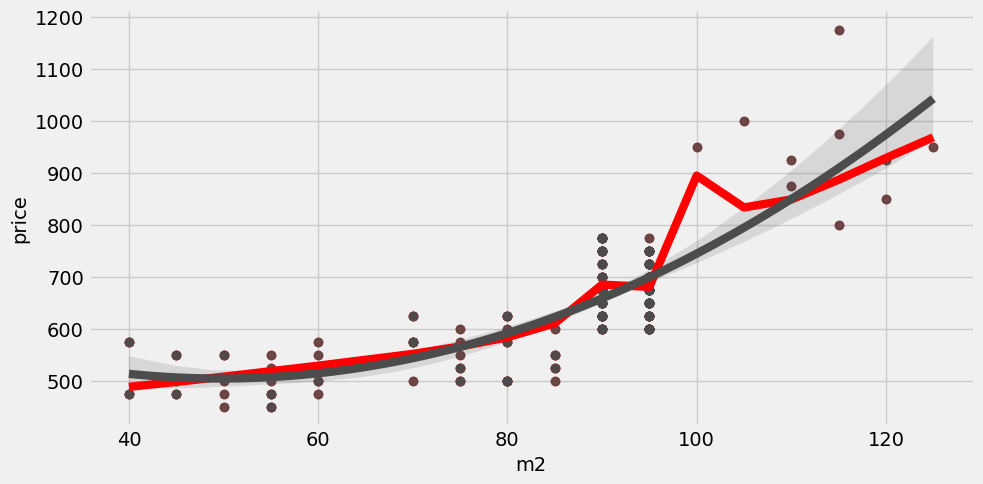

In [23]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['m2'],height=5,aspect=2)

g.map(sns.regplot,lowess=True,color='red')  # Lowess curve
g.map(sns.regplot,lowess=False,color='.3',order=2)

|<b>polynomial degree for price - floor relation

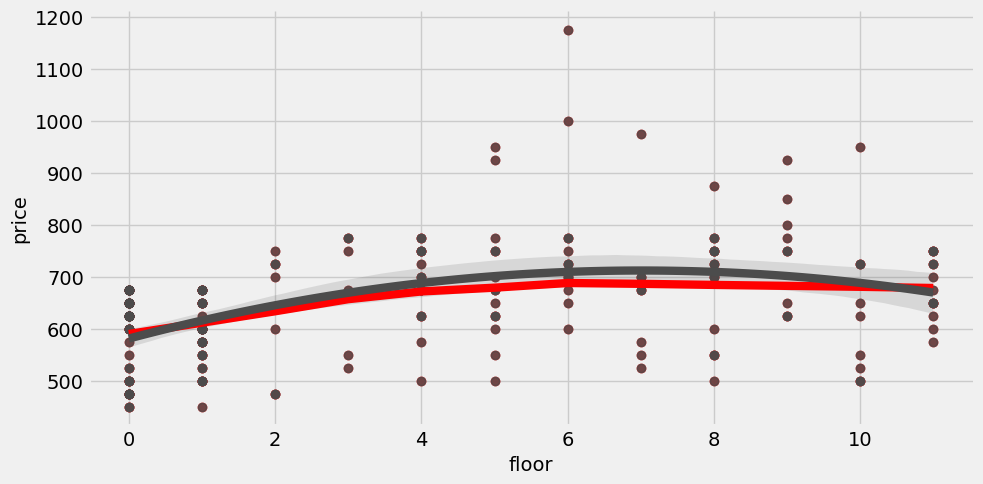

In [24]:
g = sns.PairGrid(df,y_vars=['price'],x_vars=['floor'],height=5,aspect=2)

g.map(sns.regplot,lowess=True,color='red')  # Lowess curve
g.map(sns.regplot,lowess=False,color='.3',order=2)

<b>Now, let's set the model by determining the appropriate polynomial degrees for the features that have a polynomial relationship with the target variable.

<b>Train

In [25]:
df_train = pd.concat([y_train,X_train],axis=1,sort=True)

X1_train = df_train['rooms'].values.reshape(-1,1)
X2_train = df_train['m2'].values.reshape(-1,1)
X3_train = df_train['floor'].values.reshape(-1,1)
X4_train = df_train['age'].values.reshape(-1,1)

<b>Test

In [26]:
df_test = pd.concat([y_test,X_test],axis=1,sort=True)

X1_test = df_test['rooms'].values.reshape(-1,1)
X2_test = df_test['m2'].values.reshape(-1,1)
X3_test = df_test['floor'].values.reshape(-1,1)
X4_test = df_test['age'].values.reshape(-1,1)

<b>RMSE scores for all degrees of Polynomial

# 1-) rooms

In [27]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

In [28]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X1_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X1_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

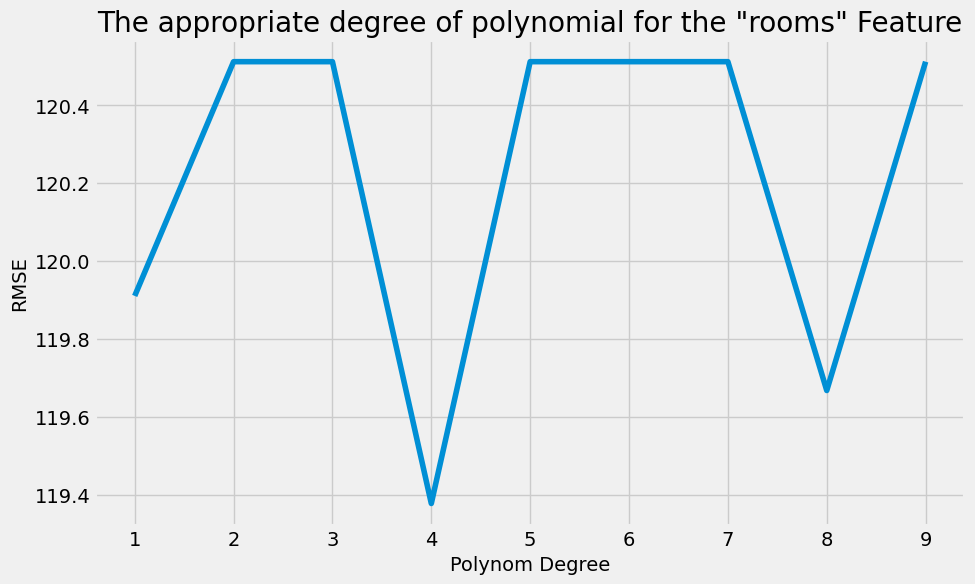

In [29]:
plt.figure(figsize=(10,6))
plt.title('The appropriate degree of polynomial for the "rooms" Feature')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('Polynom Degree')
plt.ylabel('RMSE')
plt.show()

# 2-)m2

In [30]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

In [31]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X2_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X2_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

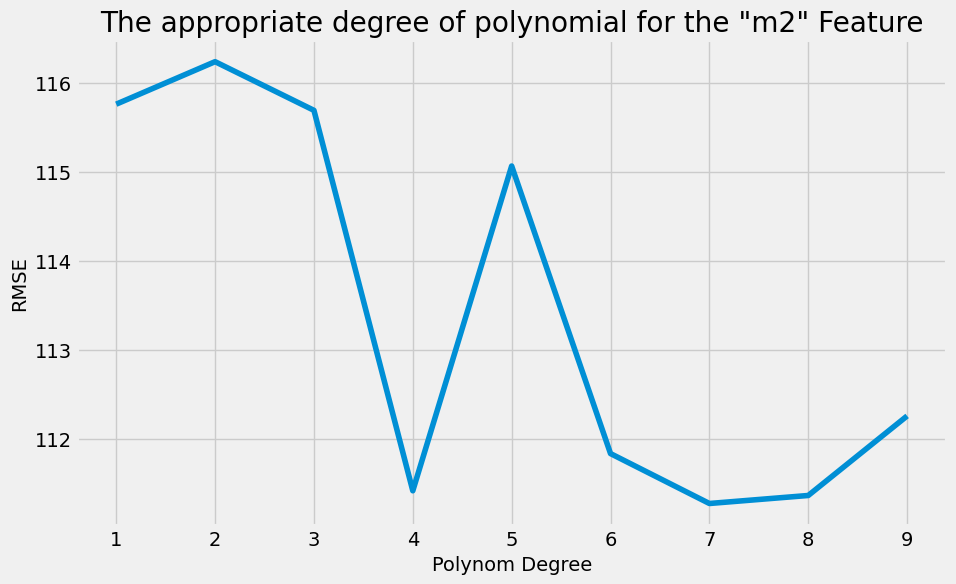

In [32]:
plt.figure(figsize=(10,6))
plt.title('The appropriate degree of polynomial for the "m2" Feature')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('Polynom Degree')
plt.ylabel('RMSE')
plt.show()

# 3-)floor

In [33]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

In [34]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X3_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X3_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

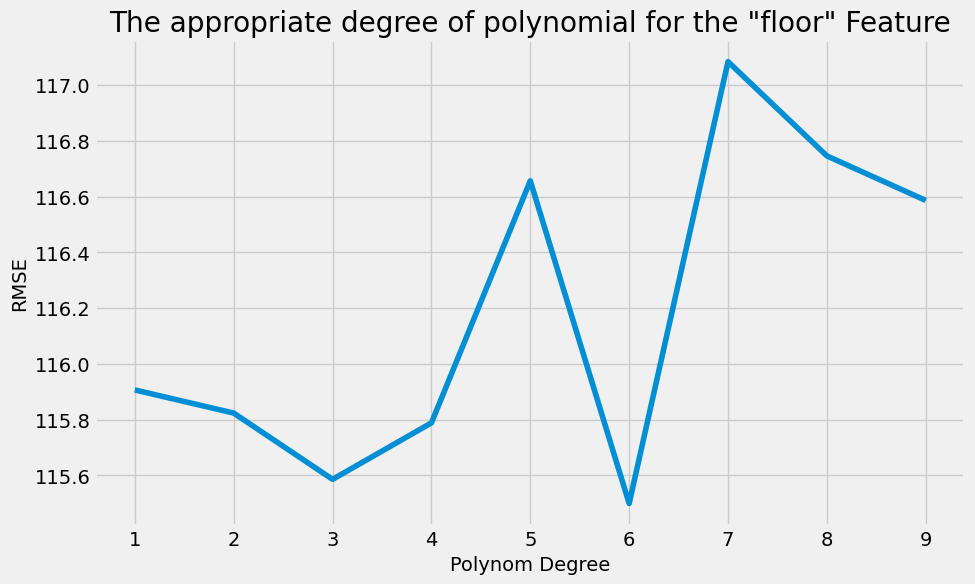

In [35]:
plt.figure(figsize=(10,6))
plt.title('The appropriate degree of polynomial for the "floor" Feature')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('Polynom Degree')
plt.ylabel('RMSE')
plt.show()

# 4-) age

In [36]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

In [37]:
for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg,include_bias=False)

    X_poly_train = poly_features.fit_transform(X4_train)

    # Linear Reg.
    poly_reg = LinearRegression().fit(X_poly_train,y_train)

    # Comparison with test set
    X_poly_test = poly_features.fit_transform(X4_test)
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test,poly_predict)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_predict))
    rmses.append(poly_rmse)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

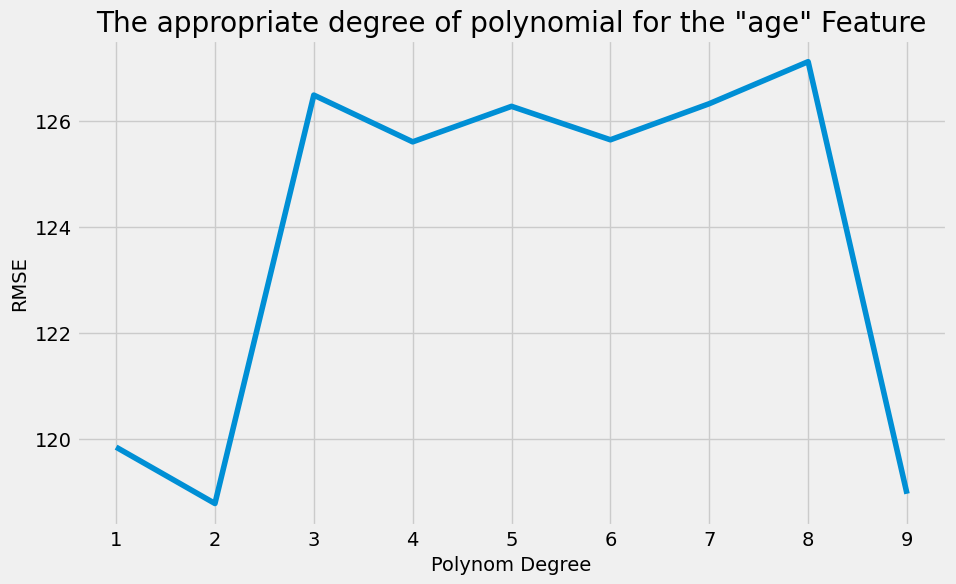

In [38]:
plt.figure(figsize=(10,6))
plt.title('The appropriate degree of polynomial for the "age" Feature')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('Polynom Degree')
plt.ylabel('RMSE')
plt.show()

# The appropriate polynomial degrees of the features are determined as (1,7,6,2), respectively.

# MODEL

In [39]:
poly_features = PolynomialFeatures(degree=1)
X1_train = poly_features.fit_transform(X1_train)
X1_test = poly_features.fit_transform(X1_test)

poly_features = PolynomialFeatures(degree=7)
X2_train = poly_features.fit_transform(X2_train)
X2_test = poly_features.fit_transform(X2_test)

poly_features = PolynomialFeatures(degree=6)
X3_train = poly_features.fit_transform(X3_train)
X3_test = poly_features.fit_transform(X3_test)

poly_features = PolynomialFeatures(degree=2)
X4_train = poly_features.fit_transform(X4_train)
X4_test = poly_features.fit_transform(X4_test)

In [40]:
X_train1 = np.concatenate((X1_train,X2_train,X3_train,X4_train),axis=1)
X_test1 = np.concatenate((X1_test,X2_test,X3_test,X4_test),axis=1)

<b>Let's create and add interaction terms

In [41]:
X_train['int1'] = X_train['rooms'].mul(X_train['m2'])
X_train['int2'] = X_train['rooms'].mul(X_train['floor'])
X_train['int3'] = X_train['rooms'].mul(X_train['age'])
X_train['int4'] = X_train['m2'].mul(X_train['floor'])
X_train['int5'] = X_train['m2'].mul(X_train['age'])
X_train['int6'] = X_train['floor'].mul(X_train['age'])

In [42]:
X_test['int1'] = X_test['rooms'].mul(X_test['m2'])
X_test['int2'] = X_test['rooms'].mul(X_test['floor'])
X_test['int3'] = X_test['rooms'].mul(X_test['age'])
X_test['int4'] = X_test['m2'].mul(X_test['floor'])
X_test['int5'] = X_test['m2'].mul(X_test['age'])
X_test['int6'] = X_test['floor'].mul(X_test['age'])

In [43]:
X_train2 = np.array(X_train[['int1','int2','int3','int4','int5','int6']])

X_test2 = np.array(X_test[['int1','int2','int3','int4','int5','int6']])

In [44]:
X_train1 = np.concatenate((X_train1, X_train2),axis=1)
X_test1 = np.concatenate((X_test1, X_test2),axis=1)

<b>Let's train the polynomial regression algorithm

In [45]:
poly_reg = LinearRegression().fit(X_train1,y_train)

In [46]:
print(f'Polynomial Reg Train R2 :{poly_reg.score(X_train1,y_train)}')
print(f'Polynomial Reg Test R2 :{poly_reg.score(X_test1,y_test)}')

Polynomial Reg Train R2 :0.8075963969219786
Polynomial Reg Test R2 :0.7579251648065389


<b>Comparing training dataset predictions with actual values

In [47]:
y_pred_train = poly_reg.predict(X_train1)

for i, prediction in enumerate(y_pred_train):
    print(f'pred_price : {prediction}  real_price : {y[i]}')

pred_price : 542.1352994552387  real_price : 475
pred_price : 668.9586013766134  real_price : 475
pred_price : 532.6732900264526  real_price : 450
pred_price : 689.8996533029464  real_price : 450
pred_price : 684.9424552266344  real_price : 475
pred_price : 650.7556338007437  real_price : 475
pred_price : 558.589620695353  real_price : 475
pred_price : 658.4474291404506  real_price : 475
pred_price : 545.7113892885295  real_price : 450
pred_price : 670.1501653473605  real_price : 475
pred_price : 869.7928396721582  real_price : 475
pred_price : 538.5914293901974  real_price : 525
pred_price : 774.7459824039029  real_price : 550
pred_price : 517.7470607077162  real_price : 575
pred_price : 565.7599912756007  real_price : 550
pred_price : 678.2140739411916  real_price : 575
pred_price : 547.2617482710274  real_price : 500
pred_price : 688.4504885963123  real_price : 550
pred_price : 657.8022958388219  real_price : 525
pred_price : 495.9309400183862  real_price : 500
pred_price : 561.7348

<b>Comparing test dataset predictions with actual values

In [48]:
y_pred_test = poly_reg.predict(X_test1)

for i, prediction in enumerate(y_pred_test):
    print(f'pred_price : {prediction}  real_price : {y[i]}')

pred_price : 696.5401995849476  real_price : 475
pred_price : 667.1182405624018  real_price : 475
pred_price : 769.8758387891442  real_price : 450
pred_price : 663.782515958209  real_price : 450
pred_price : 684.5441967872689  real_price : 475
pred_price : 509.16417144992477  real_price : 475
pred_price : 503.0338101499606  real_price : 475
pred_price : 505.2163589848392  real_price : 475
pred_price : 631.2990948122404  real_price : 450
pred_price : 668.2412813920041  real_price : 475
pred_price : 654.3541465575241  real_price : 475
pred_price : 724.9884597256486  real_price : 525
pred_price : 510.57205867259563  real_price : 550
pred_price : 733.3569364849443  real_price : 575
pred_price : 695.7072266140626  real_price : 550
pred_price : 817.2623041985803  real_price : 575
pred_price : 722.2660209584335  real_price : 500
pred_price : 673.2807485359817  real_price : 550
pred_price : 736.8830639992776  real_price : 525
pred_price : 504.4304209011692  real_price : 500
pred_price : 535.73

In [49]:
pred_price = np.append(y_pred_train,y_pred_test)
df['pred_price'] = pred_price

# Graph

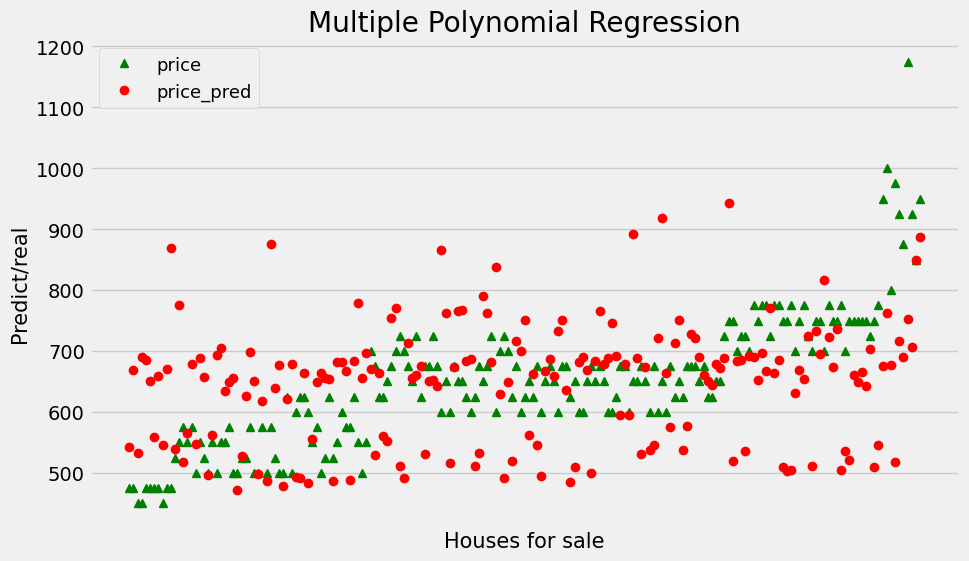

In [50]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.title('Multiple Polynomial Regression')
plt.xticks(df['price'],df.index.values)
plt.plot(df['price'],'g^',label='price')
plt.xticks(df['pred_price'],df.index.values)
plt.plot(df['pred_price'],'ro',label='price_pred')
plt.xlabel('Houses for sale',fontsize=15)
plt.ylabel('Predict/real',fontsize=15)
plt.legend(fontsize=13,loc='upper left')
plt.show()